<a href="https://colab.research.google.com/github/sarunas856/happiness/blob/main/happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predict happiness score in Dystopia

**Data Source** https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – logged GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity and perceptions of corruption - in each country.

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# improve how pandas numbers are displayed
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sarunas856/happiness/main/world-happiness-report-2021.csv', usecols=[0,2,6,7,8,9,10,11])

In [ ]:
df = df.rename(columns={'Ladder score':'Happiness score'})

In [ ]:
df.head ()

,Country name,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Happiness score               149 non-null    float64
 2   Logged GDP per capita         149 non-null    float64
 3   Social support                149 non-null    float64
 4   Healthy life expectancy       149 non-null    float64
 5   Freedom to make life choices  149 non-null    float64
 6   Generosity                    149 non-null    float64
 7   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.4+ KB


In [ ]:
df.describe()

,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,5.533,9.432,0.815,64.993,0.792,-0.015,0.727
std,1.074,1.159,0.115,6.762,0.113,0.151,0.179
min,2.523,6.635,0.463,48.478,0.382,-0.288,0.082
25%,4.852,8.541,0.750,59.802,0.718,-0.126,0.667
50%,5.534,9.569,0.832,66.603,0.804,-0.036,0.781
75%,6.255,10.421,0.905,69.600,0.877,0.079,0.845
max,7.842,11.647,0.983,76.953,0.970,0.542,0.939


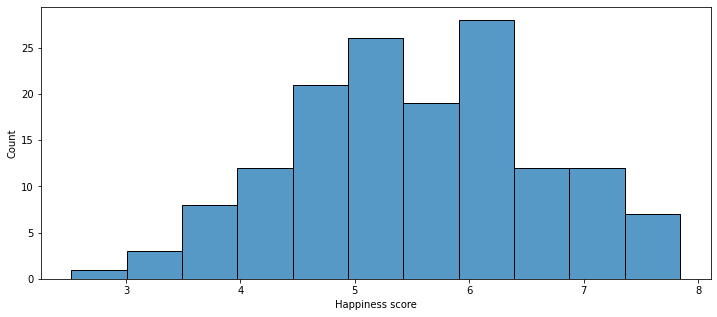

In [ ]:
def plot_hist(x):
    plt.figure(figsize=(12,5))
    plt.tight_layout()
    sns.histplot(x)
    plt.show()

plot_hist(df['Happiness score'])

In [ ]:
features = ['Happiness score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [ ]:
def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})

In [ ]:
corr_matrix = df[features].corr()

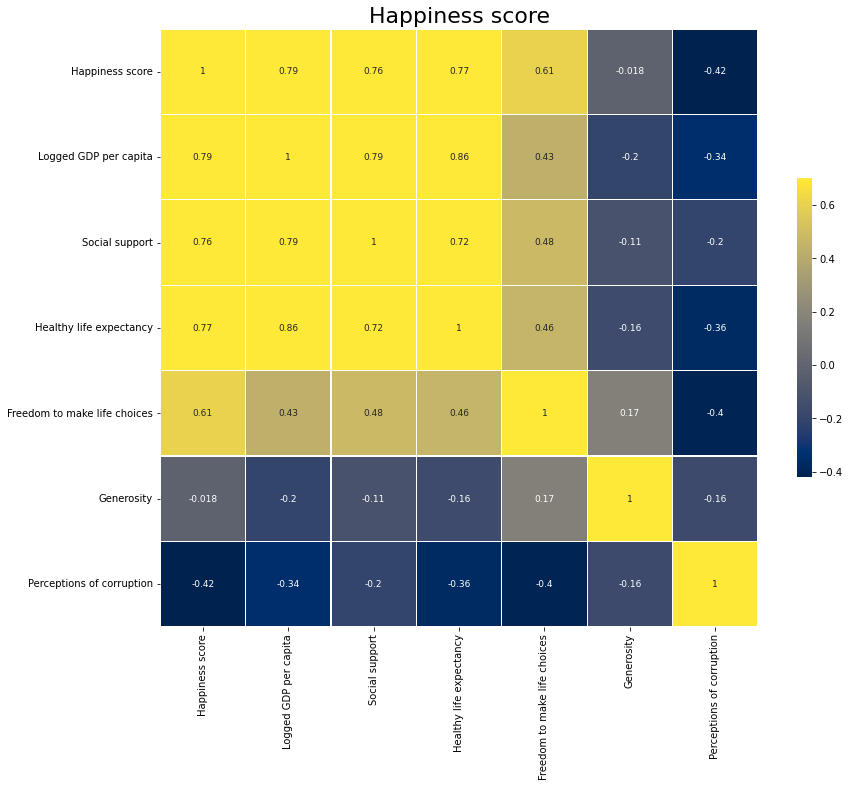

In [ ]:
corr_plot(corr_matrix, "Happiness score")

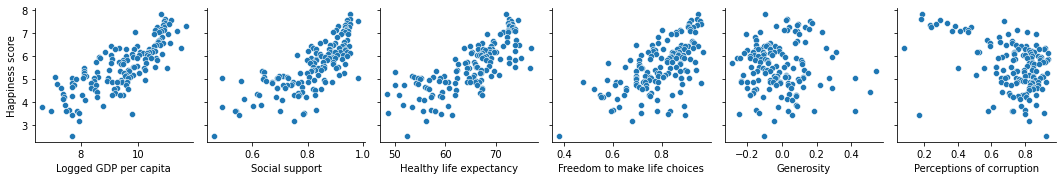

In [ ]:
sns.pairplot(data=df, x_vars=['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'], y_vars=["Happiness score"])

In [ ]:
y = df['Happiness score']
x = df[['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [ ]:
import statsmodels.api as sm 
x_train = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness score   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     73.27
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           5.06e-41
Time:                        21:07:18   Log-Likelihood:                -116.50
No. Observations:                 149   AIC:                             247.0
Df Residuals:                     142   BIC:                             268.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.2372      0.630     -3.548      0.001      -3.484      -0.991
Logged GDP per capita            0.2795      0.087      3.219      0.002       0.108       0.451
Social support                   2.4762      0.668      3.706      0.000       1.155       3.797
Healthy life expectancy          0.0303      0.013      2.274      0.024       0.004       0.057
Freedom to make life choices     2.0105      0.495      4.063      0.000       1.032       2.989
Generosity                       0.3644      0.321      1.134      0.259      -0.271       0.999
Perceptions of corruption       -0.6051      0.291     -2.083      0.039      -1.179      -0.031
==============================================================================
Omnibus:                       12.908   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.688
Skew:                          -0.667   Prob(JB):                      0.00107
Kurtosis:                       3.650   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 4)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size = 0.7, random_state=412)

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MAPE: {mape(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.0837
RMSE: 0.564


In [ ]:
from sklearn.metrics import mean_absolute_error
print(f'MAE: {mean_absolute_error(y_test, y_pred):,.2f}')

MAE: 0.44


In [ ]:
y_test_mean = np.mean(y_test)
idx_high_p = y_test > y_test_mean 

In [ ]:
print('Model performance for happier countries')
print(f'RMSE - linear model:     {rmse(y_test[idx_high_p], y_pred[idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[idx_high_p], y_pred[idx_high_p])}')

Model performance for happier countries
RMSE - linear model:     0.3322
MAPE - linear model:     0.0432


In [ ]:
print('Model performance for less happier countries')
print(f'RMSE - linear model:     {rmse(y_test[~idx_high_p], y_pred[~idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[~idx_high_p], y_pred[~idx_high_p])}')

Model performance for less happier countries
RMSE - linear model:     0.7188
MAPE - linear model:     0.1224
